In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import itertools
import matplotlib as mpl
from astropy.table import Table

plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (10.0, 8)
plt.rcParams['font.size'] = 18
mpl.ticker.AutoLocator.default_params['nbins'] = 5
mpl.ticker.AutoLocator.default_params['prune'] = 'both'

In [2]:
os.chdir('../')

In [3]:
import make_dictionaries

question_dictionary = make_dictionaries.questions
debiased_data = Table.read('../fits/full_sample_debiased.fits')
print('Loaded galaxy data...')

Loaded galaxy data...


In [15]:
in_volume_limit = debiased_data['in_volume_limit'] == True
vl_data = debiased_data[in_volume_limit]

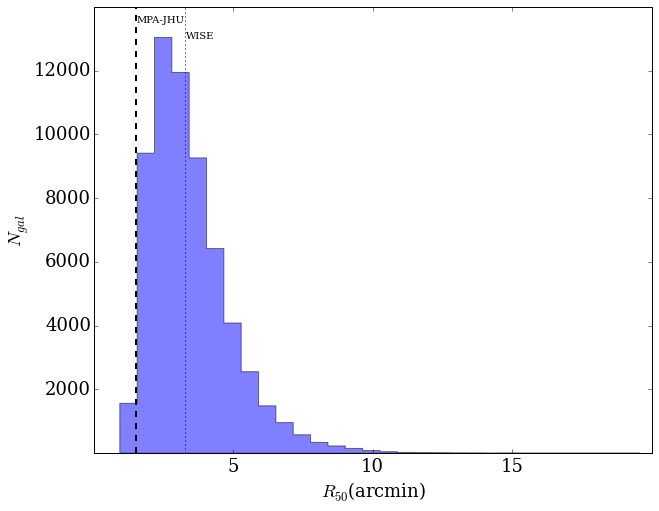

In [60]:
r50_arcsec = vl_data['PETROR50_R']
z = vl_data['REDSHIFT_1']

_ = plt.hist(r50_arcsec,histtype='stepfilled',color='b',alpha=0.5,bins=30)

plt.xlabel('$R_{50}$(arcmin)')
plt.ylabel('$N_{gal}$')
yrng = plt.gca().get_ylim()
plt.vlines(1.5,yrng[0],yrng[1],color='k',linewidth=2,linestyle='dashed')
plt.vlines(3.25,yrng[0],yrng[1],color='k',linewidth=1,linestyle='dotted')
plt.text(3.3,13000,'WISE',ha='left',fontsize=10)
plt.text(1.55,13500,'MPA-JHU',ha='left',fontsize=10)

In [29]:
low_z = (vl_data['REDSHIFT_1'] <= 0.035) & (vl_data['REDSHIFT_1'] > 0.03)
high_z = (vl_data['REDSHIFT_1'] <= 0.085) & (vl_data['REDSHIFT_1'] > 0.08)

In [37]:
finite_sfr = np.isfinite(vl_data['sfr_total_avg'])
print("{}/{} don't have SFRs".format(len(finite_sfr)-np.sum(finite_sfr),len(finite_sfr)))

low_z_sfr = vl_data['sfr_total_avg'][(low_z) & (finite_sfr)]
high_z_sfr = vl_data['sfr_total_avg'][(high_z) & (finite_sfr)]

467/62220 don't have SFRs


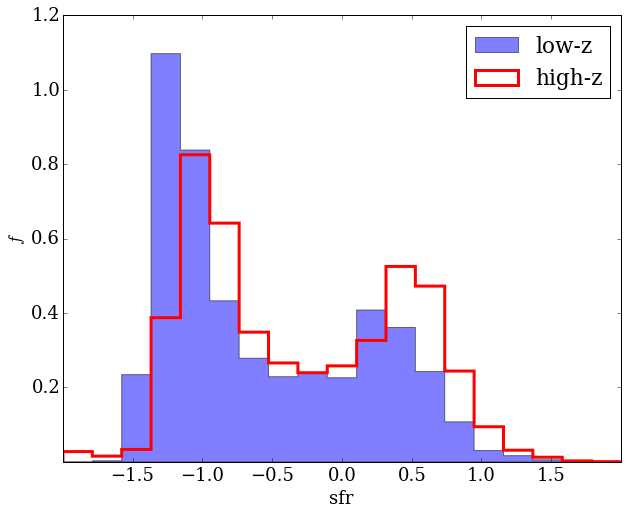

In [47]:
bins = np.linspace(-2,2,20)

_ = plt.hist(low_z_sfr,color='b',histtype='stepfilled',alpha=0.5,normed=True,bins=bins,label='low-z')
_ = plt.hist(high_z_sfr,histtype='step',color='r',normed=True,bins=bins,linewidth=3,label='high-z')
plt.legend()
plt.xlabel('sfr')
plt.ylabel('$f$')

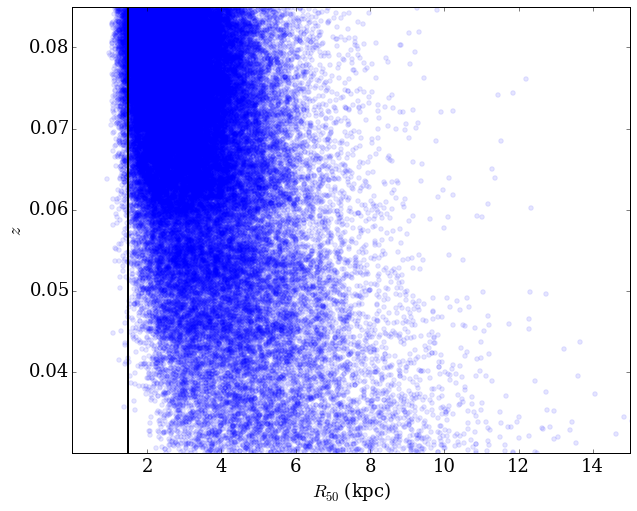

In [48]:
plt.scatter(r50_arcsec,z,alpha=0.1,color='b')
plt.xlim(0,15)
plt.ylim(0.03,0.085)
plt.vlines(1.5,0.03,0.085,color='k',linewidth=2)
plt.xlabel('$R_{50}$ (kpc)')
plt.ylabel('$z$')